Hello

# Q1.1

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from helpers.iaml01cw2_helpers import *
from templates.iaml01cw2_my_helpers import *
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import confusion_matrix

DataPath = "zaData"

Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(DataPath)

#Step 1
Xtrn_orig = Xtrn
Xtst_orig = Xtst

#Step 2
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

#Step 3
Xmean = Xtrn.mean(axis=0)

#Step 4
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

first_four = (Xtrn_nm[0,:])[:4]
last_four = (Xtrn_nm[-1,:])[:4]

def iaml01cw2_q1_1():
    print(first_four)
    print(last_four)

iaml01cw2_q1_1() 

D:\Python\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]
[-3.13725490e-06 -2.26797386e-05 -1.17973856e-04 -4.07058824e-04]


# Q1.2

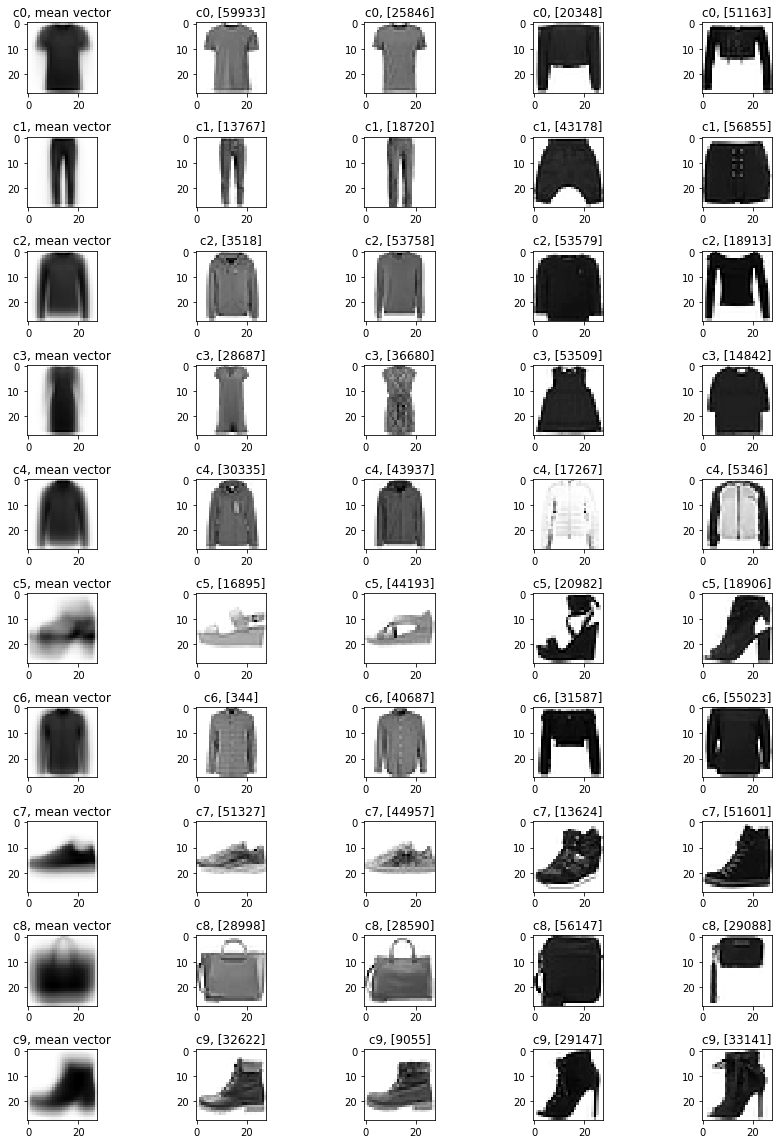

In [2]:
def euc_dis(v1, v2):
    distance = np.linalg.norm(v1-v2)
    return distance

def find_c(X, Y, c):
    X_c = X[np.argwhere(Y == c)]
    X_c = X_c.reshape(X_c.shape[0],X_c.shape[2])
    return X_c

def find_ci(X, Y, c):
    X_ci = np.argwhere(Y == c)
    return X_ci

c0i = find_ci(Xtrn, Ytrn, 0)
c1i = find_ci(Xtrn, Ytrn, 1)
c2i = find_ci(Xtrn, Ytrn, 2)
c3i = find_ci(Xtrn, Ytrn, 3)
c4i = find_ci(Xtrn, Ytrn, 4)
c5i = find_ci(Xtrn, Ytrn, 5)
c6i = find_ci(Xtrn, Ytrn, 6)
c7i = find_ci(Xtrn, Ytrn, 7)
c8i = find_ci(Xtrn, Ytrn, 8)
c9i = find_ci(Xtrn, Ytrn, 9)

c0 = find_c(Xtrn, Ytrn, 0)
c1 = find_c(Xtrn, Ytrn, 1)
c2 = find_c(Xtrn, Ytrn, 2)
c3 = find_c(Xtrn, Ytrn, 3)
c4 = find_c(Xtrn, Ytrn, 4)
c5 = find_c(Xtrn, Ytrn, 5)
c6 = find_c(Xtrn, Ytrn, 6)
c7 = find_c(Xtrn, Ytrn, 7)
c8 = find_c(Xtrn, Ytrn, 8)
c9 = find_c(Xtrn, Ytrn, 9)

c0_mean = c0.mean(axis = 0)
c1_mean = c1.mean(axis = 0)
c2_mean = c2.mean(axis = 0)
c3_mean = c3.mean(axis = 0)
c4_mean = c4.mean(axis = 0)
c5_mean = c5.mean(axis = 0)
c6_mean = c6.mean(axis = 0)
c7_mean = c7.mean(axis = 0)
c8_mean = c8.mean(axis = 0)
c9_mean = c9.mean(axis = 0)

lis_class = [c0,c1,c2,c3,c4,c5,c6,c7,c8,c9]
lis_classi = [c0i,c1i,c2i,c3i,c4i,c5i,c6i,c7i,c8i,c9i]
lis_classm = [c0_mean,c1_mean,c2_mean,c3_mean,c4_mean,c5_mean,c6_mean,c7_mean,c8_mean,c9_mean]

euc_mea = np.array([])
for i in c0:
    euc_mea = np.append(euc_mea, euc_dis(i, c0_mean))
for i in c1:
    euc_mea = np.append(euc_mea, euc_dis(i, c1_mean))
for i in c2:
    euc_mea = np.append(euc_mea, euc_dis(i, c2_mean))
for i in c3:
    euc_mea = np.append(euc_mea, euc_dis(i, c3_mean))
for i in c4:
    euc_mea = np.append(euc_mea, euc_dis(i, c4_mean))
for i in c5:
    euc_mea = np.append(euc_mea, euc_dis(i, c5_mean))
for i in c6:
    euc_mea = np.append(euc_mea, euc_dis(i, c6_mean))
for i in c7:
    euc_mea = np.append(euc_mea, euc_dis(i, c7_mean))
for i in c8:
    euc_mea = np.append(euc_mea, euc_dis(i, c8_mean))
for i in c9:
    euc_mea = np.append(euc_mea, euc_dis(i, c9_mean))
    
euc_mea = euc_mea.reshape(10,6000)

c0_mea = euc_mea[0]
c1_mea = euc_mea[1]
c2_mea = euc_mea[2]
c3_mea = euc_mea[3]
c4_mea = euc_mea[4]
c5_mea = euc_mea[5]
c6_mea = euc_mea[6]
c7_mea = euc_mea[7]
c8_mea = euc_mea[8]
c9_mea = euc_mea[9]

def find_max2(v1_mea, v1):
    i_max2 = v1_mea.argsort()[-2]
    max2 = v1[i_max2]
    return max2

def find_min2(v1_mea, v1):
    i_min2 = v1_mea.argsort()[1]
    min2 = v1[i_min2]
    return min2

def find_max(v1_mea, v1):
    i_max = np.argmax(v1_mea)
    max = v1[i_max]
    return max

def find_min(v1_mea, v1):
    i_min = np.argmin(v1_mea)
    min = v1[i_min]
    return min

def find_i_max(v1_mea, v1):
    i_max = np.argmax(v1_mea)
    max = v1[i_max]
    return i_max

def find_i_min(v1_mea, v1):
    i_min = np.argmin(v1_mea)
    min = v1[i_min]
    return i_min

def find_i_max2(v1_mea, v1):
    i_max2 = v1_mea.argsort()[-2]
    max2 = v1[i_max2]
    return i_max2

def find_i_min2(v1_mea, v1):
    i_min2 = v1_mea.argsort()[1]
    min2 = v1[i_min2]
    return i_min2

st0 = [0,0,0,0]
st1 = [0,0,0,0]
st2 = [0,0,0,0]
st3 = [0,0,0,0]
st4 = [0,0,0,0]
st5 = [0,0,0,0]
st6 = [0,0,0,0]
st7 = [0,0,0,0]
st8 = [0,0,0,0]
st9 = [0,0,0,0]

str0 = []
str1 = []
str2 = []
str3 = []
str4 = []
str5 = []
str6 = []
str7 = []
str8 = []
str9 = []

name = [st0, st1, st2, st3, st4, st5, st6, st7, st8, st9]
strs = [str0, str1, str2, str3, str4, str5, str6, str7, str8, str9]
mea_name = [c0_mea, c1_mea, c2_mea, c3_mea, c4_mea, c5_mea, c6_mea, c7_mea, c8_mea, c9_mea]
c_name_str = ['c0, ', 'c1, ', 'c2, ', 'c3, ', 'c4, ', 'c5, ', 'c6, ', 'c7, ', 'c8, ', 'c9, ']
c_name = [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]
ci_name = [c0i, c1i, c2i, c3i, c4i, c5i, c6i, c7i, c8i, c9i]

for i in range(10):
    (name[i])[0] = ci_name[i][find_i_min(mea_name[i],c_name[i])]
    (name[i])[1] = ci_name[i][find_i_min2(mea_name[i],c_name[i])]
    (name[i])[2] = ci_name[i][find_i_max2(mea_name[i],c_name[i])]
    (name[i])[3] = ci_name[i][find_i_max(mea_name[i],c_name[i])]
    
for i in range(10):
    strs[i].append(c_name_str[i] + str((name[i])[0]))
    strs[i].append(c_name_str[i] + str((name[i])[1]))
    strs[i].append(c_name_str[i] + str((name[i])[2]))
    strs[i].append(c_name_str[i] + str((name[i])[3]))
    
def iaml01cw2_q1_2():
    fig_1_2 = plt.figure(figsize=(12, 16))
    #c0
    plt.subplot(10,5,1)
    plt.imshow(c0_mean.reshape(28,28), "gray_r")
    plt.title('c0, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,2)
    plt.imshow(find_min(c0_mea, c0).reshape(28,28), "gray_r")
    plt.title(str0[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,3)
    plt.imshow(find_min2(c0_mea, c0).reshape(28,28), "gray_r")
    plt.title(str0[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,4)
    plt.imshow(find_max2(c0_mea, c0).reshape(28,28), "gray_r")
    plt.title(str0[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,5)
    plt.imshow(find_max(c0_mea, c0).reshape(28,28), "gray_r")
    plt.title(str0[3],fontdict = {'fontsize': 'large'})

    #c1
    plt.subplot(10,5,6)
    plt.imshow(c1_mean.reshape(28,28), "gray_r")
    plt.title('c1, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,7)
    plt.imshow(find_min(c1_mea, c1).reshape(28,28), "gray_r")
    plt.title(str1[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,8)
    plt.imshow(find_min2(c1_mea, c1).reshape(28,28), "gray_r")
    plt.title(str1[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,9)
    plt.imshow(find_max2(c1_mea, c1).reshape(28,28), "gray_r")
    plt.title(str1[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,10)
    plt.imshow(find_max(c1_mea, c1).reshape(28,28), "gray_r")
    plt.title(str1[3],fontdict = {'fontsize': 'large'})
    #c2
    plt.subplot(10,5,11)
    plt.imshow(c2_mean.reshape(28,28), "gray_r")
    plt.title('c2, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,12)
    plt.imshow(find_min(c2_mea, c2).reshape(28,28), "gray_r")
    plt.title(str2[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,13)
    plt.imshow(find_min2(c2_mea, c2).reshape(28,28), "gray_r")
    plt.title(str2[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,14)
    plt.imshow(find_max2(c2_mea, c2).reshape(28,28), "gray_r")
    plt.title(str2[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,15)
    plt.imshow(find_max(c2_mea, c2).reshape(28,28), "gray_r")
    plt.title(str2[3],fontdict = {'fontsize': 'large'})
    #c3
    plt.subplot(10,5,16)
    plt.imshow(c3_mean.reshape(28,28), "gray_r")
    plt.title('c3, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,17)
    plt.imshow(find_min(c3_mea, c3).reshape(28,28), "gray_r")
    plt.title(str3[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,18)
    plt.imshow(find_min2(c3_mea, c3).reshape(28,28), "gray_r")
    plt.title(str3[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,19)
    plt.imshow(find_max2(c3_mea, c3).reshape(28,28), "gray_r")
    plt.title(str3[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,20)
    plt.imshow(find_max(c3_mea, c3).reshape(28,28), "gray_r")
    plt.title(str3[3],fontdict = {'fontsize': 'large'})
    #c4
    plt.subplot(10,5,21)
    plt.imshow(c4_mean.reshape(28,28), "gray_r")
    plt.title('c4, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,22)
    plt.imshow(find_min(c4_mea, c4).reshape(28,28), "gray_r")
    plt.title(str4[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,23)
    plt.imshow(find_min2(c4_mea, c4).reshape(28,28), "gray_r")
    plt.title(str4[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,24)
    plt.imshow(find_max2(c4_mea, c4).reshape(28,28), "gray_r")
    plt.title(str4[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,25)
    plt.imshow(find_max(c4_mea, c4).reshape(28,28), "gray_r")
    plt.title(str4[3],fontdict = {'fontsize': 'large'})
    #c5
    plt.subplot(10,5,26)
    plt.imshow(c5_mean.reshape(28,28), "gray_r")
    plt.title('c5, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,27)
    plt.imshow(find_min(c5_mea, c5).reshape(28,28), "gray_r")
    plt.title(str5[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,28)
    plt.imshow(find_min2(c5_mea, c5).reshape(28,28), "gray_r")
    plt.title(str5[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,29)
    plt.imshow(find_max2(c5_mea, c5).reshape(28,28), "gray_r")
    plt.title(str5[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,30)
    plt.imshow(find_max(c5_mea, c5).reshape(28,28), "gray_r")
    plt.title(str5[3],fontdict = {'fontsize': 'large'})
    #c6
    plt.subplot(10,5,31)
    plt.imshow(c6_mean.reshape(28,28), "gray_r")
    plt.title('c6, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,32)
    plt.imshow(find_min(c6_mea, c6).reshape(28,28), "gray_r")
    plt.title(str6[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,33)
    plt.imshow(find_min2(c6_mea, c6).reshape(28,28), "gray_r")
    plt.title(str6[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,34)
    plt.imshow(find_max2(c6_mea, c6).reshape(28,28), "gray_r")
    plt.title(str6[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,35)
    plt.imshow(find_max(c6_mea, c6).reshape(28,28), "gray_r")
    plt.title(str6[3],fontdict = {'fontsize': 'large'})
    #c7
    plt.subplot(10,5,36)
    plt.imshow(c7_mean.reshape(28,28), "gray_r")
    plt.title('c7, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,37)
    plt.imshow(find_min(c7_mea, c7).reshape(28,28), "gray_r")
    plt.title(str7[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,38)
    plt.imshow(find_min2(c7_mea, c7).reshape(28,28), "gray_r")
    plt.title(str7[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,39)
    plt.imshow(find_max2(c7_mea, c7).reshape(28,28), "gray_r")
    plt.title(str7[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,40)
    plt.imshow(find_max(c7_mea, c7).reshape(28,28), "gray_r")
    plt.title(str7[3],fontdict = {'fontsize': 'large'})
    #c8
    plt.subplot(10,5,41)
    plt.imshow(c8_mean.reshape(28,28), "gray_r")
    plt.title('c8, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,42)
    plt.imshow(find_min(c8_mea, c8).reshape(28,28), "gray_r")
    plt.title(str8[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,43)
    plt.imshow(find_min2(c8_mea, c8).reshape(28,28), "gray_r")
    plt.title(str8[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,44)
    plt.imshow(find_max2(c8_mea, c8).reshape(28,28), "gray_r")
    plt.title(str8[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,45)
    plt.imshow(find_max(c8_mea, c8).reshape(28,28), "gray_r")
    plt.title(str8[3],fontdict = {'fontsize': 'large'})
    #c9
    plt.subplot(10,5,46)
    plt.imshow(c9_mean.reshape(28,28), "gray_r")
    plt.title('c9, mean vector',fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,47)
    plt.imshow(find_min(c9_mea, c9).reshape(28,28), "gray_r")
    plt.title(str9[0],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,48)
    plt.imshow(find_min2(c9_mea, c9).reshape(28,28), "gray_r")
    plt.title(str9[1],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,49)
    plt.imshow(find_max2(c9_mea, c9).reshape(28,28), "gray_r")
    plt.title(str9[2],fontdict = {'fontsize': 'large'})
    plt.subplot(10,5,50)
    plt.imshow(find_max(c9_mea, c9).reshape(28,28), "gray_r")
    plt.title(str9[3],fontdict = {'fontsize': 'large'})

    fig_1_2.tight_layout()
    
iaml01cw2_q1_2()

# Q1.3

In [3]:
pca_1_3 = PCA().fit(Xtrn_nm)

def iaml01cw2_q1_3():
    print(pca_1_3.explained_variance_[:5])
    
iaml01cw2_q1_3()

[19.80980567 12.11221047  4.10615661  3.38182839  2.62477022]


# Q1.4

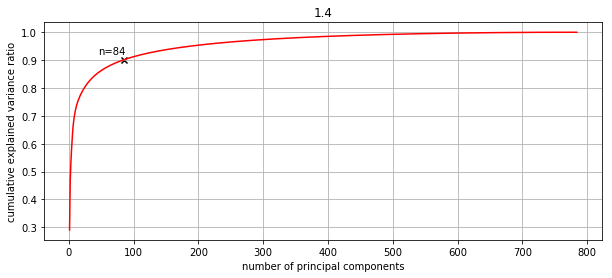

In [4]:
def cum_ratio(ratio, size):
    lis_cum = []
    for i in np.arange(size+1)[1:]:
        cum = np.sum(ratio[:i])
        lis_cum.append(cum)
    ar_cum = np.array(lis_cum)
        
    return ar_cum

def iaml01cw2_q1_4():
    y_1_4 = cum_ratio(pca_1_3.explained_variance_ratio_, 784)
    x_1_4 = np.arange(1,785)

    plt.figure(figsize=(10,4))
    plt.plot(x_1_4, y_1_4, c = 'red')
    plt.scatter(x_1_4[84], y_1_4[84], c= 'black', marker = 'x')
    plt.annotate(s='n=84', xy = (45, 0.92),textcoords = None)
    plt.xlabel('number of principal components')
    plt.ylabel('cumulative explained variance ratio')
    plt.title("1.4")
    plt.grid()
    
iaml01cw2_q1_4()

# Q1.5

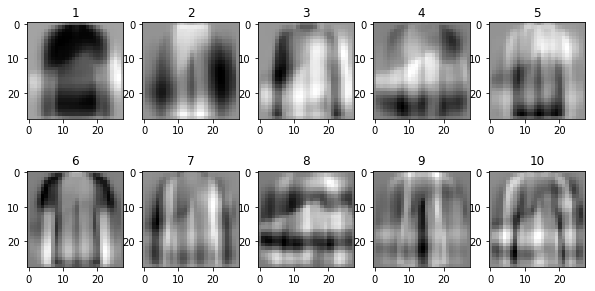

In [5]:
im_1_5 = pca_1_3.components_[:10]

def iaml01cw2_q1_5():
    fig_1_5 = plt.figure(figsize=(10, 5))
    plt.subplot(2,5,1)
    plt.imshow(im_1_5[0].reshape(28,28), "gray_r")
    plt.title('1',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,2)
    plt.imshow(im_1_5[1].reshape(28,28), "gray_r")
    plt.title('2',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,3)
    plt.imshow(im_1_5[2].reshape(28,28), "gray_r")
    plt.title('3',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,4)
    plt.imshow(im_1_5[3].reshape(28,28), "gray_r")
    plt.title('4',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,5)
    plt.imshow(im_1_5[4].reshape(28,28), "gray_r")
    plt.title('5',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,6)
    plt.imshow(im_1_5[5].reshape(28,28), "gray_r")
    plt.title('6',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,7)
    plt.imshow(im_1_5[6].reshape(28,28), "gray_r")
    plt.title('7',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,8)
    plt.imshow(im_1_5[7].reshape(28,28), "gray_r")
    plt.title('8',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,9)
    plt.imshow(im_1_5[8].reshape(28,28), "gray_r")
    plt.title('9',fontdict = {'fontsize': 'large'})

    plt.subplot(2,5,10)
    plt.imshow(im_1_5[9].reshape(28,28), "gray_r")
    plt.title('10',fontdict = {'fontsize': 'large'})
    
iaml01cw2_q1_5()

# Q1.6

In [6]:
def cal_RMSE(origin, new):
    rmse = np.sqrt(mean_squared_error(origin, new))
    return rmse

def find_first(Xtrn_nm, Ytrn, c):
    for i in np.arange(Xtrn_nm.shape[0]):
        if Ytrn[i] == c:
            return Xtrn_nm[i]
            break
            
sp_1_6 = np.zeros([10,784])

for i in np.arange(10):
    this_sp = find_first(Xtrn_nm, Ytrn, i)
    sp_1_6[i] = this_sp
    
pca_5 = PCA(n_components = 5)
pca_20 = PCA(n_components = 20)
pca_50 = PCA(n_components = 50)
pca_200 = PCA(n_components = 200)

fit_5 = pca_5.fit(Xtrn_nm)
fit_20 = pca_20.fit(Xtrn_nm)
fit_50 = pca_50.fit(Xtrn_nm)
fit_200 = pca_200.fit(Xtrn_nm)

first_c0 = find_first(Xtrn_nm, Ytrn, 0)
first_c1 = find_first(Xtrn_nm, Ytrn, 1)
first_c2 = find_first(Xtrn_nm, Ytrn, 2)
first_c3 = find_first(Xtrn_nm, Ytrn, 3)
first_c4 = find_first(Xtrn_nm, Ytrn, 4)
first_c5 = find_first(Xtrn_nm, Ytrn, 5)
first_c6 = find_first(Xtrn_nm, Ytrn, 6)
first_c7 = find_first(Xtrn_nm, Ytrn, 7)
first_c8 = find_first(Xtrn_nm, Ytrn, 8)
first_c9 = find_first(Xtrn_nm, Ytrn, 9)

trans_5_c0 = fit_5.transform(first_c0.reshape(1, -1))
trans_5_c1 = fit_5.transform(first_c1.reshape(1, -1))
trans_5_c2 = fit_5.transform(first_c2.reshape(1, -1))
trans_5_c3 = fit_5.transform(first_c3.reshape(1, -1))
trans_5_c4 = fit_5.transform(first_c4.reshape(1, -1))
trans_5_c5 = fit_5.transform(first_c5.reshape(1, -1))
trans_5_c6 = fit_5.transform(first_c6.reshape(1, -1))
trans_5_c7 = fit_5.transform(first_c7.reshape(1, -1))
trans_5_c8 = fit_5.transform(first_c8.reshape(1, -1))
trans_5_c9 = fit_5.transform(first_c9.reshape(1, -1))

trans_20_c0 = fit_20.transform(first_c0.reshape(1, -1))
trans_20_c1 = fit_20.transform(first_c1.reshape(1, -1))
trans_20_c2 = fit_20.transform(first_c2.reshape(1, -1))
trans_20_c3 = fit_20.transform(first_c3.reshape(1, -1))
trans_20_c4 = fit_20.transform(first_c4.reshape(1, -1))
trans_20_c5 = fit_20.transform(first_c5.reshape(1, -1))
trans_20_c6 = fit_20.transform(first_c6.reshape(1, -1))
trans_20_c7 = fit_20.transform(first_c7.reshape(1, -1))
trans_20_c8 = fit_20.transform(first_c8.reshape(1, -1))
trans_20_c9 = fit_20.transform(first_c9.reshape(1, -1))

trans_50_c0 = fit_50.transform(first_c0.reshape(1, -1))
trans_50_c1 = fit_50.transform(first_c1.reshape(1, -1))
trans_50_c2 = fit_50.transform(first_c2.reshape(1, -1))
trans_50_c3 = fit_50.transform(first_c3.reshape(1, -1))
trans_50_c4 = fit_50.transform(first_c4.reshape(1, -1))
trans_50_c5 = fit_50.transform(first_c5.reshape(1, -1))
trans_50_c6 = fit_50.transform(first_c6.reshape(1, -1))
trans_50_c7 = fit_50.transform(first_c7.reshape(1, -1))
trans_50_c8 = fit_50.transform(first_c8.reshape(1, -1))
trans_50_c9 = fit_50.transform(first_c9.reshape(1, -1))

trans_200_c0 = fit_200.transform(first_c0.reshape(1, -1))
trans_200_c1 = fit_200.transform(first_c1.reshape(1, -1))
trans_200_c2 = fit_200.transform(first_c2.reshape(1, -1))
trans_200_c3 = fit_200.transform(first_c3.reshape(1, -1))
trans_200_c4 = fit_200.transform(first_c4.reshape(1, -1))
trans_200_c5 = fit_200.transform(first_c5.reshape(1, -1))
trans_200_c6 = fit_200.transform(first_c6.reshape(1, -1))
trans_200_c7 = fit_200.transform(first_c7.reshape(1, -1))
trans_200_c8 = fit_200.transform(first_c8.reshape(1, -1))
trans_200_c9 = fit_200.transform(first_c9.reshape(1, -1))

re_5_c0 = fit_5.inverse_transform(trans_5_c0)
re_5_c1 = fit_5.inverse_transform(trans_5_c1)
re_5_c2 = fit_5.inverse_transform(trans_5_c2)
re_5_c3 = fit_5.inverse_transform(trans_5_c3)
re_5_c4 = fit_5.inverse_transform(trans_5_c4)
re_5_c5 = fit_5.inverse_transform(trans_5_c5)
re_5_c6 = fit_5.inverse_transform(trans_5_c6)
re_5_c7 = fit_5.inverse_transform(trans_5_c7)
re_5_c8 = fit_5.inverse_transform(trans_5_c8)
re_5_c9 = fit_5.inverse_transform(trans_5_c9)

re_20_c0 = fit_20.inverse_transform(trans_20_c0)
re_20_c1 = fit_20.inverse_transform(trans_20_c1)
re_20_c2 = fit_20.inverse_transform(trans_20_c2)
re_20_c3 = fit_20.inverse_transform(trans_20_c3)
re_20_c4 = fit_20.inverse_transform(trans_20_c4)
re_20_c5 = fit_20.inverse_transform(trans_20_c5)
re_20_c6 = fit_20.inverse_transform(trans_20_c6)
re_20_c7 = fit_20.inverse_transform(trans_20_c7)
re_20_c8 = fit_20.inverse_transform(trans_20_c8)
re_20_c9 = fit_20.inverse_transform(trans_20_c9)

re_50_c0 = fit_50.inverse_transform(trans_50_c0)
re_50_c1 = fit_50.inverse_transform(trans_50_c1)
re_50_c2 = fit_50.inverse_transform(trans_50_c2)
re_50_c3 = fit_50.inverse_transform(trans_50_c3)
re_50_c4 = fit_50.inverse_transform(trans_50_c4)
re_50_c5 = fit_50.inverse_transform(trans_50_c5)
re_50_c6 = fit_50.inverse_transform(trans_50_c6)
re_50_c7 = fit_50.inverse_transform(trans_50_c7)
re_50_c8 = fit_50.inverse_transform(trans_50_c8)
re_50_c9 = fit_50.inverse_transform(trans_50_c9)

re_200_c0 = fit_200.inverse_transform(trans_200_c0)
re_200_c1 = fit_200.inverse_transform(trans_200_c1)
re_200_c2 = fit_200.inverse_transform(trans_200_c2)
re_200_c3 = fit_200.inverse_transform(trans_200_c3)
re_200_c4 = fit_200.inverse_transform(trans_200_c4)
re_200_c5 = fit_200.inverse_transform(trans_200_c5)
re_200_c6 = fit_200.inverse_transform(trans_200_c6)
re_200_c7 = fit_200.inverse_transform(trans_200_c7)
re_200_c8 = fit_200.inverse_transform(trans_200_c8)
re_200_c9 = fit_200.inverse_transform(trans_200_c9)

RMSE_5_c0 = cal_RMSE(re_5_c0, first_c0.reshape(1, -1))
RMSE_5_c1 = cal_RMSE(re_5_c1, first_c1.reshape(1, -1))
RMSE_5_c2 = cal_RMSE(re_5_c2, first_c2.reshape(1, -1))
RMSE_5_c3 = cal_RMSE(re_5_c3, first_c3.reshape(1, -1))
RMSE_5_c4 = cal_RMSE(re_5_c4, first_c4.reshape(1, -1))
RMSE_5_c5 = cal_RMSE(re_5_c5, first_c5.reshape(1, -1))
RMSE_5_c6 = cal_RMSE(re_5_c6, first_c6.reshape(1, -1))
RMSE_5_c7 = cal_RMSE(re_5_c7, first_c7.reshape(1, -1))
RMSE_5_c8 = cal_RMSE(re_5_c8, first_c8.reshape(1, -1))
RMSE_5_c9 = cal_RMSE(re_5_c9, first_c9.reshape(1, -1))

RMSE_20_c0 = cal_RMSE(re_20_c0, first_c0.reshape(1, -1))
RMSE_20_c1 = cal_RMSE(re_20_c1, first_c1.reshape(1, -1))
RMSE_20_c2 = cal_RMSE(re_20_c2, first_c2.reshape(1, -1))
RMSE_20_c3 = cal_RMSE(re_20_c3, first_c3.reshape(1, -1))
RMSE_20_c4 = cal_RMSE(re_20_c4, first_c4.reshape(1, -1))
RMSE_20_c5 = cal_RMSE(re_20_c5, first_c5.reshape(1, -1))
RMSE_20_c6 = cal_RMSE(re_20_c6, first_c6.reshape(1, -1))
RMSE_20_c7 = cal_RMSE(re_20_c7, first_c7.reshape(1, -1))
RMSE_20_c8 = cal_RMSE(re_20_c8, first_c8.reshape(1, -1))
RMSE_20_c9 = cal_RMSE(re_20_c9, first_c9.reshape(1, -1))

RMSE_50_c0 = cal_RMSE(re_50_c0, first_c0.reshape(1, -1))
RMSE_50_c1 = cal_RMSE(re_50_c1, first_c1.reshape(1, -1))
RMSE_50_c2 = cal_RMSE(re_50_c2, first_c2.reshape(1, -1))
RMSE_50_c3 = cal_RMSE(re_50_c3, first_c3.reshape(1, -1))
RMSE_50_c4 = cal_RMSE(re_50_c4, first_c4.reshape(1, -1))
RMSE_50_c5 = cal_RMSE(re_50_c5, first_c5.reshape(1, -1))
RMSE_50_c6 = cal_RMSE(re_50_c6, first_c6.reshape(1, -1))
RMSE_50_c7 = cal_RMSE(re_50_c7, first_c7.reshape(1, -1))
RMSE_50_c8 = cal_RMSE(re_50_c8, first_c8.reshape(1, -1))
RMSE_50_c9 = cal_RMSE(re_50_c9, first_c9.reshape(1, -1))

RMSE_200_c0 = cal_RMSE(re_200_c0, first_c0.reshape(1, -1))
RMSE_200_c1 = cal_RMSE(re_200_c1, first_c1.reshape(1, -1))
RMSE_200_c2 = cal_RMSE(re_200_c2, first_c2.reshape(1, -1))
RMSE_200_c3 = cal_RMSE(re_200_c3, first_c3.reshape(1, -1))
RMSE_200_c4 = cal_RMSE(re_200_c4, first_c4.reshape(1, -1))
RMSE_200_c5 = cal_RMSE(re_200_c5, first_c5.reshape(1, -1))
RMSE_200_c6 = cal_RMSE(re_200_c6, first_c6.reshape(1, -1))
RMSE_200_c7 = cal_RMSE(re_200_c7, first_c7.reshape(1, -1))
RMSE_200_c8 = cal_RMSE(re_200_c8, first_c8.reshape(1, -1))
RMSE_200_c9 = cal_RMSE(re_200_c9, first_c9.reshape(1, -1))

RMSE_5 = np.array([RMSE_5_c0, 
RMSE_5_c1,
RMSE_5_c2,
RMSE_5_c3,
RMSE_5_c4,
RMSE_5_c5,
RMSE_5_c6,
RMSE_5_c7,
RMSE_5_c8,
RMSE_5_c9])

RMSE_20 = np.array([RMSE_20_c0, 
RMSE_20_c1,
RMSE_20_c2,
RMSE_20_c3,
RMSE_20_c4,
RMSE_20_c5,
RMSE_20_c6,
RMSE_20_c7,
RMSE_20_c8,
RMSE_20_c9])

RMSE_50 = np.array([RMSE_50_c0, 
RMSE_50_c1,
RMSE_50_c2,
RMSE_50_c3,
RMSE_50_c4,
RMSE_50_c5,
RMSE_50_c6,
RMSE_50_c7,
RMSE_50_c8,
RMSE_50_c9])

RMSE_200 = np.array([RMSE_200_c0, 
RMSE_200_c1,
RMSE_200_c2,
RMSE_200_c3,
RMSE_200_c4,
RMSE_200_c5,
RMSE_200_c6,
RMSE_200_c7,
RMSE_200_c8,
RMSE_200_c9])


def iaml01cw2_q1_6():
    print('K = 5', np.round(RMSE_5, 3))
    print('K = 20',np.round(RMSE_20, 3))
    print('K = 50',np.round(RMSE_50, 3))
    print('K = 200',np.round(RMSE_200, 3))

iaml01cw2_q1_6()

K = 5 [0.256 0.198 0.199 0.146 0.118 0.181 0.129 0.166 0.223 0.184]
K = 20 [0.15  0.14  0.146 0.107 0.103 0.159 0.096 0.128 0.145 0.151]
K = 50 [0.127 0.095 0.123 0.084 0.088 0.143 0.071 0.107 0.124 0.122]
K = 200 [0.062 0.036 0.079 0.056 0.047 0.09  0.046 0.063 0.092 0.071]


# Q1.7

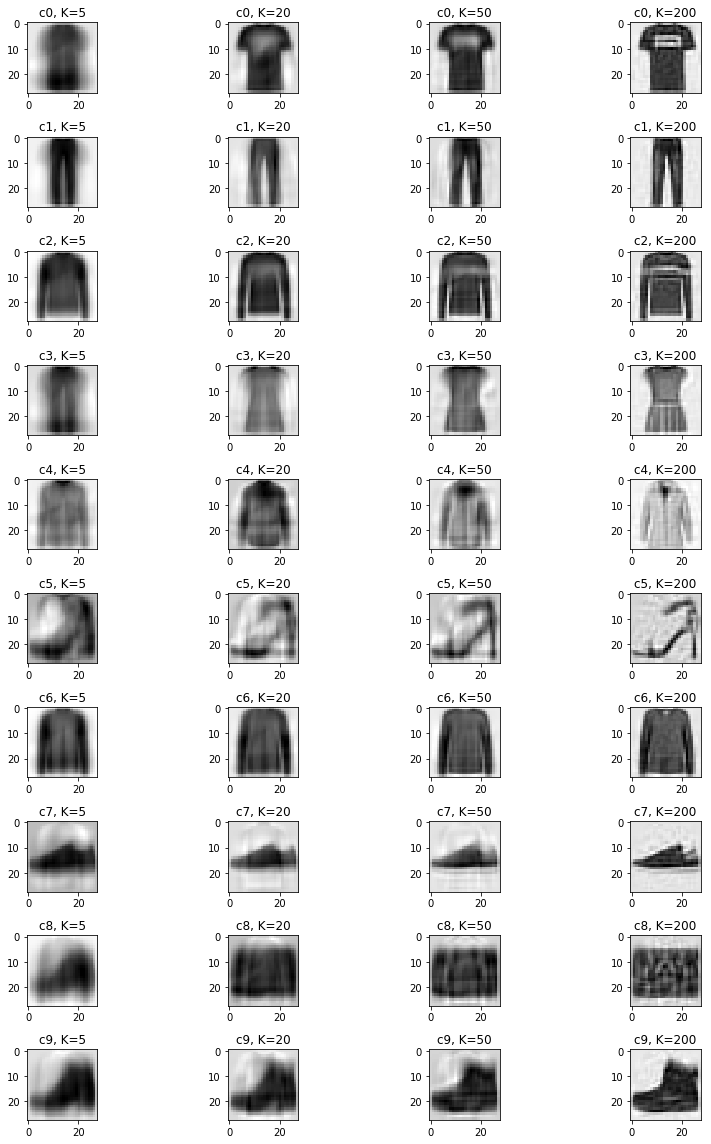

In [7]:
def iaml01cw2_q1_7():
    fig_1_7 = plt.figure(figsize=(12,16))
    #c0
    plt.subplot(10,4,1)
    plt.imshow((re_5_c0 + Xmean).reshape(28,28),'gray_r')
    plt.title('c0, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,2)
    plt.imshow((re_20_c0 + Xmean).reshape(28,28),'gray_r')
    plt.title('c0, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,3)
    plt.imshow((re_50_c0 + Xmean).reshape(28,28),'gray_r')
    plt.title('c0, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,4)
    plt.imshow((re_200_c0 + Xmean).reshape(28,28),'gray_r')
    plt.title('c0, K=200',fontdict = {'fontsize': 'large'})
    #c1
    plt.subplot(10,4,5)
    plt.imshow((re_5_c1 + Xmean).reshape(28,28),'gray_r')
    plt.title('c1, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,6)
    plt.imshow((re_20_c1 + Xmean).reshape(28,28),'gray_r')
    plt.title('c1, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,7)
    plt.imshow((re_50_c1 + Xmean).reshape(28,28),'gray_r')
    plt.title('c1, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,8)
    plt.imshow((re_200_c1 + Xmean).reshape(28,28),'gray_r')
    plt.title('c1, K=200',fontdict = {'fontsize': 'large'})
    #c2
    plt.subplot(10,4,9)
    plt.imshow((re_5_c2 + Xmean).reshape(28,28),'gray_r')
    plt.title('c2, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,10)
    plt.imshow((re_20_c2 + Xmean).reshape(28,28),'gray_r')
    plt.title('c2, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,11)
    plt.imshow((re_50_c2 + Xmean).reshape(28,28),'gray_r')
    plt.title('c2, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,12)
    plt.imshow((re_200_c2 + Xmean).reshape(28,28),'gray_r')
    plt.title('c2, K=200',fontdict = {'fontsize': 'large'})
    #c3
    plt.subplot(10,4,13)
    plt.imshow((re_5_c3 + Xmean).reshape(28,28),'gray_r')
    plt.title('c3, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,14)
    plt.imshow((re_20_c3 + Xmean).reshape(28,28),'gray_r')
    plt.title('c3, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,15)
    plt.imshow((re_50_c3 + Xmean).reshape(28,28),'gray_r')
    plt.title('c3, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,16)
    plt.imshow((re_200_c3 + Xmean).reshape(28,28),'gray_r')
    plt.title('c3, K=200',fontdict = {'fontsize': 'large'})
    #c4
    plt.subplot(10,4,17)
    plt.imshow((re_5_c4 + Xmean).reshape(28,28),'gray_r')
    plt.title('c4, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,18)
    plt.imshow((re_20_c4 + Xmean).reshape(28,28),'gray_r')
    plt.title('c4, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,19)
    plt.imshow((re_50_c4 + Xmean).reshape(28,28),'gray_r')
    plt.title('c4, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,20)
    plt.imshow((re_200_c4 + Xmean).reshape(28,28),'gray_r')
    plt.title('c4, K=200',fontdict = {'fontsize': 'large'})
    #c5
    plt.subplot(10,4,21)
    plt.imshow((re_5_c5 + Xmean).reshape(28,28),'gray_r')
    plt.title('c5, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,22)
    plt.imshow((re_20_c5 + Xmean).reshape(28,28),'gray_r')
    plt.title('c5, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,23)
    plt.imshow((re_50_c5 + Xmean).reshape(28,28),'gray_r')
    plt.title('c5, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,24)
    plt.imshow((re_200_c5 + Xmean).reshape(28,28),'gray_r')
    plt.title('c5, K=200',fontdict = {'fontsize': 'large'})
    #c6
    plt.subplot(10,4,25)
    plt.imshow((re_5_c6 + Xmean).reshape(28,28),'gray_r')
    plt.title('c6, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,26)
    plt.imshow((re_20_c6 + Xmean).reshape(28,28),'gray_r')
    plt.title('c6, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,27)
    plt.imshow((re_50_c6 + Xmean).reshape(28,28),'gray_r')
    plt.title('c6, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,28)
    plt.imshow((re_200_c6 + Xmean).reshape(28,28),'gray_r')
    plt.title('c6, K=200',fontdict = {'fontsize': 'large'})
    #c7
    plt.subplot(10,4,29)
    plt.imshow((re_5_c7 + Xmean).reshape(28,28),'gray_r')
    plt.title('c7, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,30)
    plt.imshow((re_20_c7 + Xmean).reshape(28,28),'gray_r')
    plt.title('c7, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,31)
    plt.imshow((re_50_c7 + Xmean).reshape(28,28),'gray_r')
    plt.title('c7, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,32)
    plt.imshow((re_200_c7 + Xmean).reshape(28,28),'gray_r')
    plt.title('c7, K=200',fontdict = {'fontsize': 'large'})
    #c8
    plt.subplot(10,4,33)
    plt.imshow((re_5_c8 + Xmean).reshape(28,28),'gray_r')
    plt.title('c8, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,34)
    plt.imshow((re_20_c8 + Xmean).reshape(28,28),'gray_r')
    plt.title('c8, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,35)
    plt.imshow((re_50_c8 + Xmean).reshape(28,28),'gray_r')
    plt.title('c8, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,36)
    plt.imshow((re_200_c8 + Xmean).reshape(28,28),'gray_r')
    plt.title('c8, K=200',fontdict = {'fontsize': 'large'})
    #c9
    plt.subplot(10,4,37)
    plt.imshow((re_5_c9 + Xmean).reshape(28,28),'gray_r')
    plt.title('c9, K=5',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,38)
    plt.imshow((re_20_c9 + Xmean).reshape(28,28),'gray_r')
    plt.title('c9, K=20',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,39)
    plt.imshow((re_50_c9 + Xmean).reshape(28,28),'gray_r')
    plt.title('c9, K=50',fontdict = {'fontsize': 'large'})
    plt.subplot(10,4,40)
    plt.imshow((re_200_c9 + Xmean).reshape(28,28),'gray_r')
    plt.title('c9, K=200',fontdict = {'fontsize': 'large'})
    
    fig_1_7.tight_layout()
    
iaml01cw2_q1_7()

# Q1.8

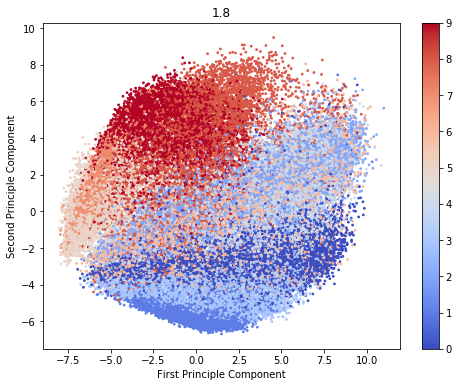

In [8]:
def iaml01cw2_q1_8():
    ttrans_18 = pca_1_3.transform(Xtrn_nm)
    plt.figure(figsize=(8,6))
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    plt.title("1.8")
    plt.scatter(ttrans_18[:,0], ttrans_18[:,1],s=3, cmap='coolwarm', c = Ytrn)
    plt.colorbar().set_ticks(np.linspace(0,10,11))
    
iaml01cw2_q1_8()